In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def overall_comparsion(n):
        # Initialize a list to store ticker symbols
    nse_tickers = []
    
    # Get stock tickers from user input
    for i in range(n):
        while True:  # Loop until valid input is provided
            ticker = input(f"Enter the name of stock {i + 1}: ").strip().upper()
            if ticker:  # Check if input is not empty
                nse_tickers.append(ticker)
                break  # Exit the loop if valid ticker is entered
            else:
                print("Please enter a valid stock ticker.")

    # Download stock data
    
    stocks = yf.download(nse_tickers, start="2010-01-01", end=None)

    # Extracting the Close prices
    
    close = stocks['Close']
     # Normalizing the closing prices
    
    normclose = close.div(close.iloc[0]).mul(100)

    # Plotting the normalized close prices
    plt.figure(figsize=(14, 8))  # Set a reasonable figure size
    plt.style.use("seaborn-v0_8")  # Use a Seaborn style
    normclose.plot(figsize=(28, 15), fontsize=12, linewidth=1.5)
    
    # Customize the plot
    plt.title('Normalized Closing Prices of Selected Stocks', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Normalized Price', fontsize=14)
    plt.legend(fontsize=12)
    
    # Show the plot
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()
    
    
    
    ret=close.pct_change().dropna()
    summary=ret.describe().T.loc[:,["mean","std"]]
    summary["mean"]=summary["mean"]*252
    summary["std"]=summary["std"]*np.sqrt(252)
    summary.plot.scatter(x="std",y="mean",figsize=(12,8),s=50,fontsize=15)
    for i in summary.index:
        plt.annotate(i,xy=(summary.loc[i,"std"]+0.002,summary.loc[i,"mean"]+0.002),size=15)
        plt.xlabel("Annual risk(std)",fontsize=15)
        plt.ylabel("Annual return",fontsize=15)
        plt.title("Risk/Return",fontsize=15)
        plt.show()
    
    
    plt.figure(figsize=(12,8))
    sns.set(font_scale=1.4)
    sns.heatmap(ret.corr(),cmap="Reds",annot=True,annot_kws={"size":15},vmax=0.6)
    plt.show()

Enter the name of stock 1:  reliance.ns
Enter the name of stock 2:  hdfcbank.ns
Enter the name of stock 3:  tcs.ns


[*********************100%***********************]  3 of 3 completed


<Figure size 1400x800 with 0 Axes>

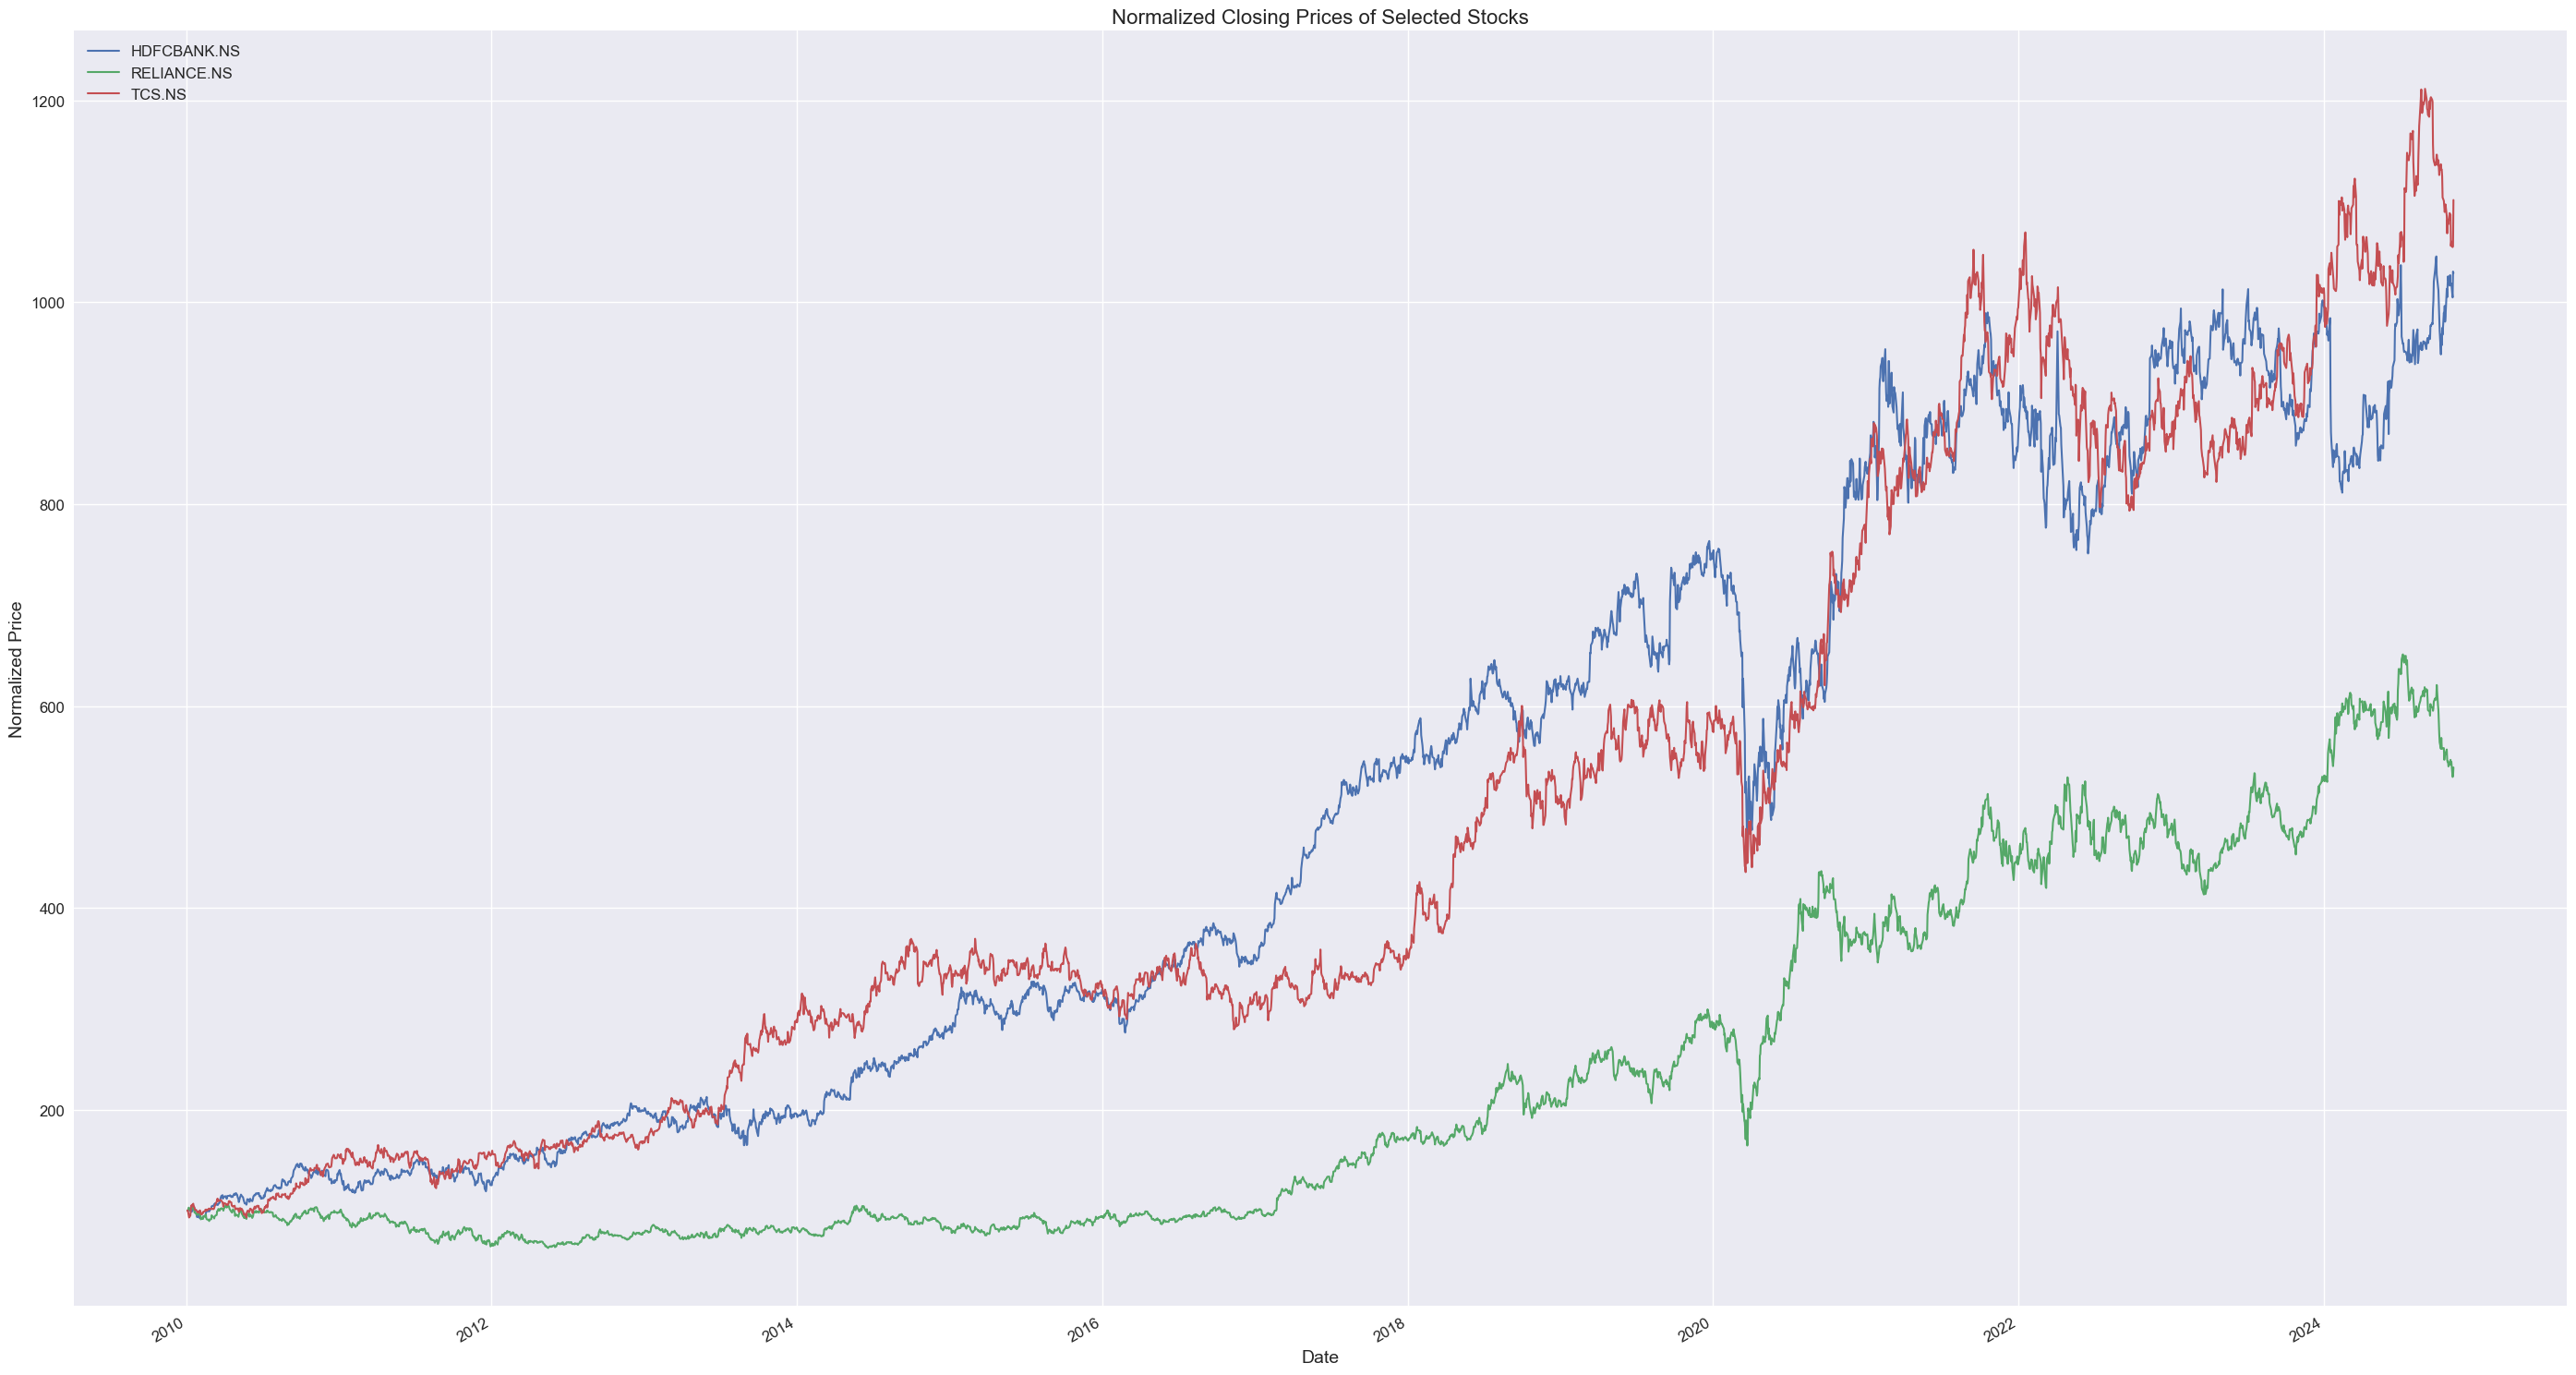

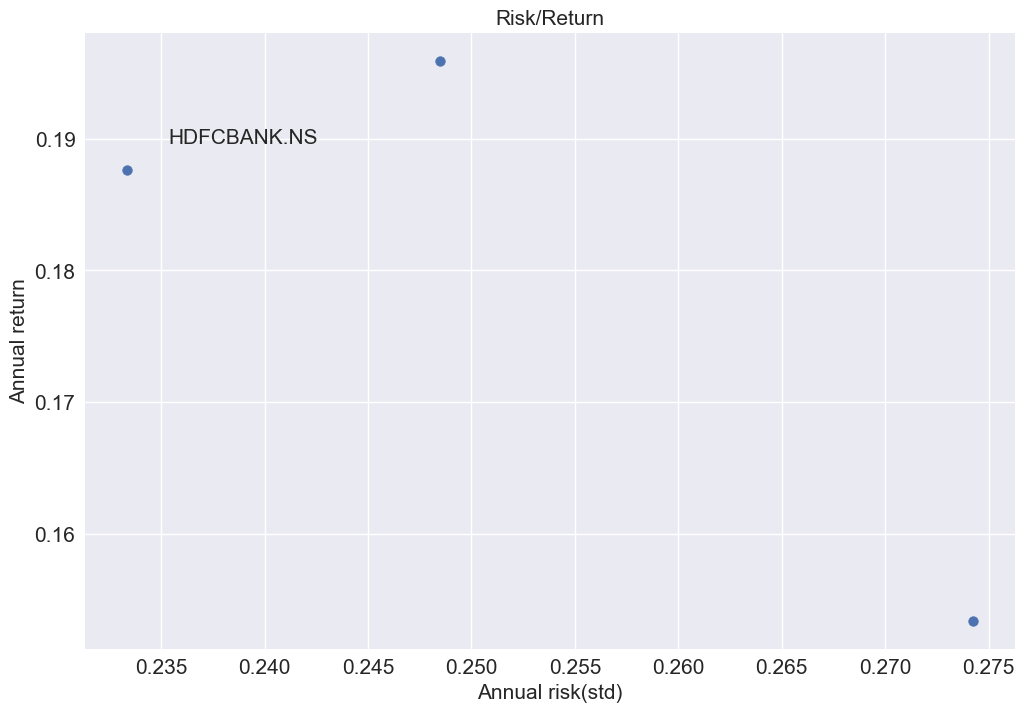

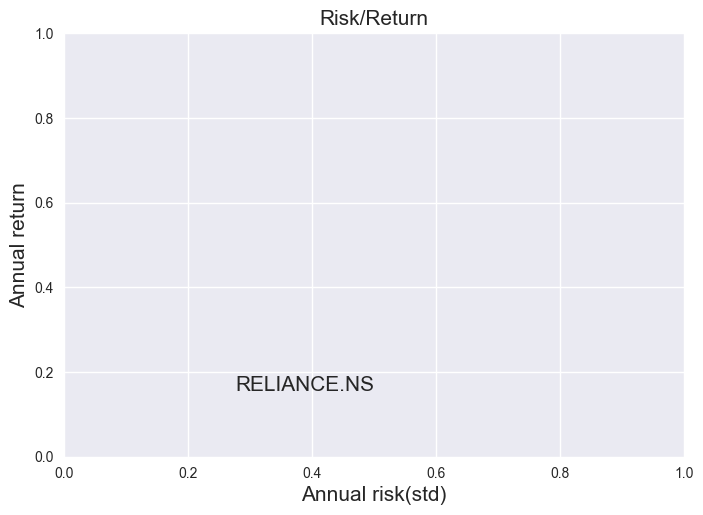

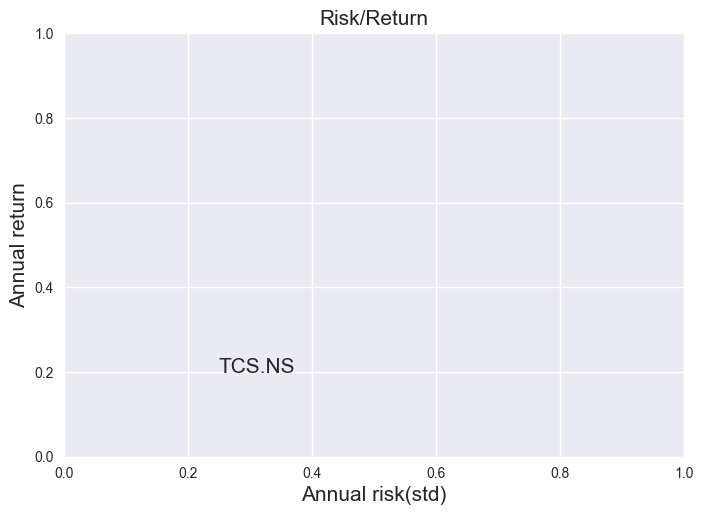

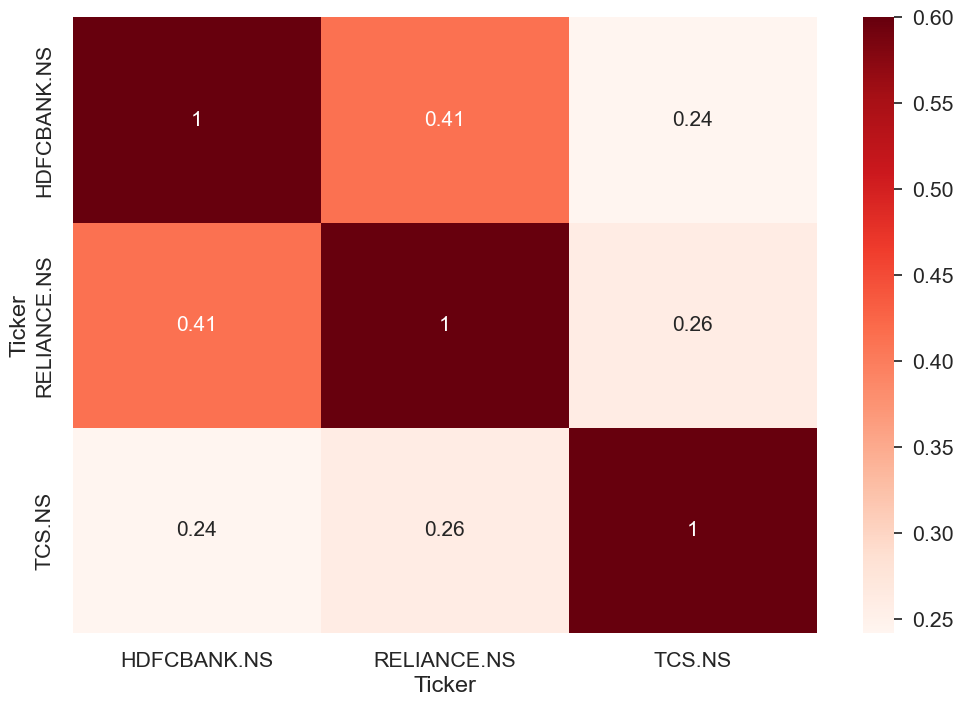

In [2]:
overall_comparsion(3)